In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [2]:
df_train = pd.read_csv('datasets/dataset_train.csv')
df_train

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1595,Gryffindor,Jung,Blank,2001-09-14,Right,49009.0,354.280086,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-0.649983,-250.39401,185.83
1596,1596,Slytherin,Shelli,Lock,1998-03-12,Left,63296.0,367.531174,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-0.333962,-246.42719,44.80
1597,1597,Gryffindor,Benjamin,Christensen,1999-10-24,Right,63905.0,544.018925,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,0.071569,-251.63679,198.47
1598,1598,Hufflepuff,Charlotte,Dillon,2001-09-21,Left,82713.0,453.676219,3.442831,-4.536762,6.738,-831.741123,383.444937,3.813111,1087.949205,3.904100,-0.531875,-246.19072,-76.81


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 19 columns):
Index                            1600 non-null int64
Hogwarts House                   1600 non-null object
First Name                       1600 non-null object
Last Name                        1600 non-null object
Birthday                         1600 non-null object
Best Hand                        1600 non-null object
Arithmancy                       1566 non-null float64
Astronomy                        1568 non-null float64
Herbology                        1567 non-null float64
Defense Against the Dark Arts    1569 non-null float64
Divination                       1561 non-null float64
Muggle Studies                   1565 non-null float64
Ancient Runes                    1565 non-null float64
History of Magic                 1557 non-null float64
Transfiguration                  1566 non-null float64
Potions                          1570 non-null float64
Care of Magical Crea

In [4]:
df_train['Hogwarts House'].value_counts()

Hufflepuff    529
Ravenclaw     443
Gryffindor    327
Slytherin     301
Name: Hogwarts House, dtype: int64

In [5]:
df_train.describe()

,Index,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
count,1600.00000,1566.000000,1568.000000,1567.000000,1569.000000,1561.000000,1565.000000,1565.000000,1557.000000,1566.000000,1570.000000,1560.000000,1600.000000,1600.000000
mean,799.50000,49634.570243,39.797131,1.141020,-0.387863,3.153910,-224.589915,495.747970,2.963095,1030.096946,5.950373,-0.053427,-243.374409,21.958012
std,462.02453,16679.806036,520.298268,5.219682,5.212794,4.155301,486.344840,106.285165,4.425775,44.125116,3.147854,0.971457,8.783640,97.631602
min,0.00000,-24370.000000,-966.740546,-10.295663,-10.162119,-8.727000,-1086.496835,283.869609,-8.858993,906.627320,-4.697484,-3.313676,-261.048920,-181.470000
25%,399.75000,38511.500000,-489.551387,-4.308182,-5.259095,3.099000,-577.580096,397.511047,2.218653,1026.209993,3.646785,-0.671606,-250.652600,-41.870000
50%,799.50000,49013.500000,260.289446,3.469012,-2.589342,4.624000,-419.164294,463.918305,4.378176,1045.506996,5.874837,-0.044811,-244.867765,-2.515000
75%,1199.25000,60811.250000,524.771949,5.419183,4.904680,5.667000,254.994857,597.492230,5.825242,1058.436410,8.248173,0.589919,-232.552305,50.560000
max,1599.00000,104956.000000,1016.211940,11.612895,9.667405,10.032000,1092.388611,745.396220,11.889713,1098.958201,13.536762,3.056546,-225.428140,279.070000


In [6]:
# df_train_num = df_train.drop(['Index', 'Hogwarts House', 'First Name', 'Last Name', 'Birthday', 'Best Hand'], axis=1)
# scaler = StandardScaler()
# tmp = pd.DataFrame(scaler.fit_transform(df_train_num), columns=df_train_num.columns)
# df_train = pd.concat([df_train[['Index', 'Hogwarts House', 'First Name', 'Last Name', 'Birthday', 'Best Hand']], tmp], axis=1)
# df_train

In [7]:
df_train_houses_encoded, df_train_houses_categories = df_train['Hogwarts House'].factorize()
encoder = OneHotEncoder()
houses_1hot = encoder.fit_transform(df_train_houses_encoded.reshape(-1, 1))
tmp = pd.DataFrame(houses_1hot.toarray(), columns=df_train_houses_categories)
df_train = pd.concat([tmp, df_train.drop(['Hogwarts House', 'Index'], axis=1)], axis=1)
df_train

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,Ravenclaw,Slytherin,Gryffindor,Hufflepuff,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,...,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,1.0,0.0,0.0,0.0,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,...,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,0.0,1.0,0.0,0.0,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,...,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,1.0,0.0,0.0,0.0,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,...,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,0.0,0.0,1.0,0.0,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,...,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,0.0,0.0,1.0,0.0,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,...,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.0,0.0,1.0,0.0,Jung,Blank,2001-09-14,Right,49009.0,354.280086,...,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-0.649983,-250.39401,185.83
1596,0.0,1.0,0.0,0.0,Shelli,Lock,1998-03-12,Left,63296.0,367.531174,...,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-0.333962,-246.42719,44.80
1597,0.0,0.0,1.0,0.0,Benjamin,Christensen,1999-10-24,Right,63905.0,544.018925,...,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,0.071569,-251.63679,198.47
1598,0.0,0.0,0.0,1.0,Charlotte,Dillon,2001-09-21,Left,82713.0,453.676219,...,-4.536762,6.738,-831.741123,383.444937,3.813111,1087.949205,3.904100,-0.531875,-246.19072,-76.81


In [8]:
len(df_train['Last Name'].unique())

1378

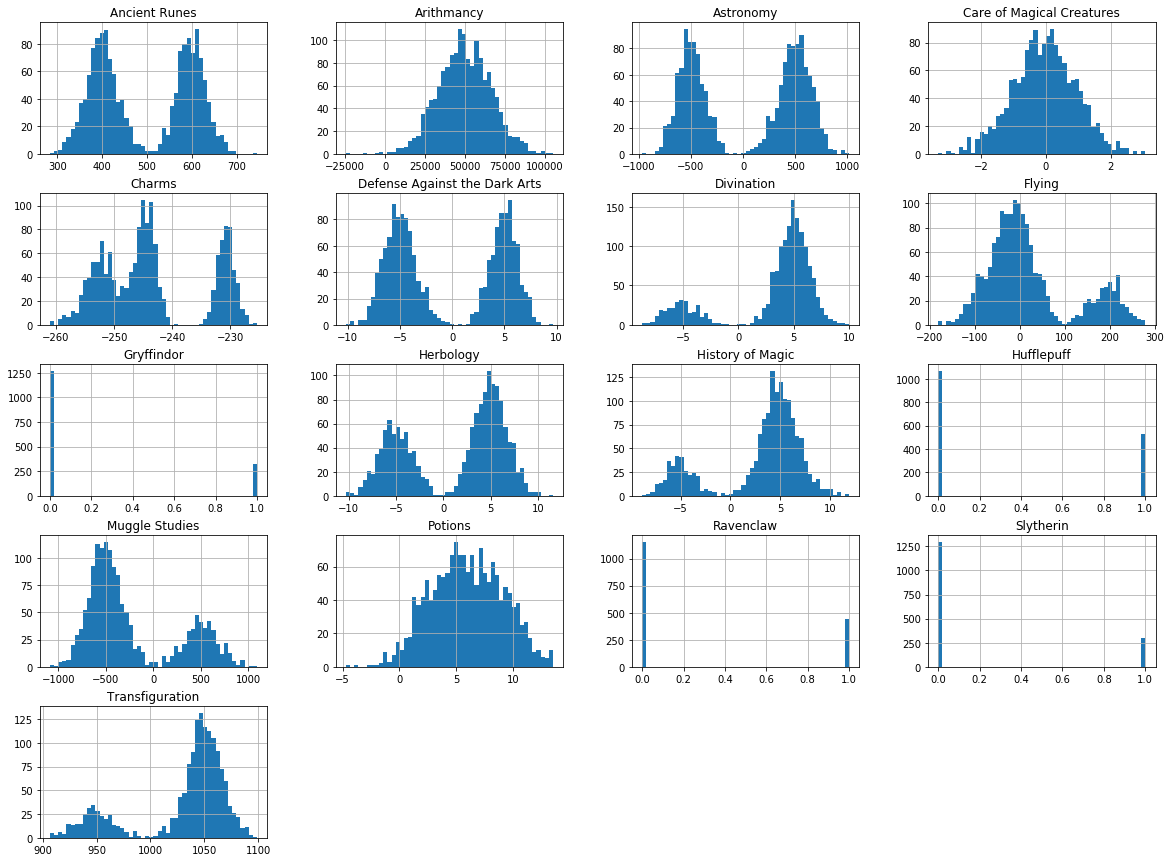

In [9]:
df_train.hist(bins=50, figsize=(20, 15))
None

In [10]:
imputer = SimpleImputer(strategy='mean')
df_train_num = df_train.drop(['First Name', 'Last Name', 'Birthday', 'Best Hand'], axis=1)
df_train_fillna = imputer.fit_transform(df_train_num)
df_tr = pd.DataFrame(df_train_fillna, columns=df_train_num.columns)
df_tr

,Ravenclaw,Slytherin,Gryffindor,Hufflepuff,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,1.0,0.0,0.0,0.0,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,0.0,1.0,0.0,0.0,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,1.0,0.0,0.0,0.0,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,0.0,0.0,1.0,0.0,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,0.0,0.0,1.0,0.0,60158.0,436.775204,-7.820623,-0.387863,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.0,0.0,1.0,0.0,49009.0,354.280086,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-0.649983,-250.39401,185.83
1596,0.0,1.0,0.0,0.0,63296.0,367.531174,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-0.333962,-246.42719,44.80
1597,0.0,0.0,1.0,0.0,63905.0,544.018925,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,0.071569,-251.63679,198.47
1598,0.0,0.0,0.0,1.0,82713.0,453.676219,3.442831,-4.536762,6.738,-831.741123,383.444937,3.813111,1087.949205,3.904100,-0.531875,-246.19072,-76.81


In [11]:
corr_matrix = df_tr.corr()
corr_matrix

,Ravenclaw,Slytherin,Gryffindor,Hufflepuff,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
Ravenclaw,1.000000,-0.297861,-0.313614,-0.434879,-0.006869,-0.612018,0.454532,0.612967,0.270340,0.889412,0.591147,0.269994,0.280472,0.200589,0.035990,0.866331,-0.164442
Slytherin,-0.297861,1.000000,-0.243971,-0.338308,-0.007429,-0.489557,-0.540542,0.489279,-0.903798,-0.250194,-0.418863,0.215214,0.232495,0.530984,-0.016462,-0.340914,-0.455124
Gryffindor,-0.313614,-0.243971,1.000000,-0.356199,-0.015315,0.440964,-0.569069,-0.439654,0.211892,-0.282931,0.477588,-0.881128,-0.897425,-0.483769,-0.044772,-0.540058,0.867550
Hufflepuff,-0.434879,-0.338308,-0.356199,1.000000,0.025832,0.610832,0.504512,-0.612627,0.312063,-0.395592,-0.623672,0.319684,0.309332,-0.217228,0.017822,-0.077873,-0.209137
Arithmancy,-0.006869,-0.007429,-0.015315,0.025832,1.000000,-0.032540,-0.018226,0.036652,-0.003398,-0.053742,0.075624,-0.068187,-0.004563,-0.297055,-0.041003,-0.099592,-0.164384
Astronomy,-0.612018,-0.489557,0.440964,0.610832,-0.032540,1.000000,0.019809,-0.979051,0.471090,-0.564476,-0.188920,-0.401755,-0.432794,-0.548289,-0.012595,-0.516089,0.519415
Herbology,0.454532,-0.540542,-0.569069,0.504512,-0.018226,0.019809,1.000000,-0.023344,0.537424,0.426967,-0.042004,0.497349,0.524048,-0.103593,0.046636,0.738583,-0.267672
Defense Against the Dark Arts,0.612967,0.489279,-0.439654,-0.612627,0.036652,-0.979051,-0.023344,1.000000,-0.469232,0.564165,0.189650,0.400656,0.433118,0.547290,0.010614,0.515748,-0.522186
Divination,0.270340,-0.903798,0.211892,0.312063,-0.003398,0.471090,0.537424,-0.469232,1.000000,0.244401,0.424800,-0.166060,-0.160931,-0.470244,0.022872,0.391246,0.397357
Muggle Studies,0.889412,-0.250194,-0.282931,-0.395592,-0.053742,-0.564476,0.426967,0.564165,0.244401,1.000000,0.557502,0.281488,0.259408,0.180243,0.049169,0.834791,-0.182213


In [12]:
y_train = df_tr[['Ravenclaw', 'Slytherin', 'Gryffindor', 'Hufflepuff']]
y_train

,Ravenclaw,Slytherin,Gryffindor,Hufflepuff
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
1595,0.0,0.0,1.0,0.0
1596,0.0,1.0,0.0,0.0
1597,0.0,0.0,1.0,0.0
1598,0.0,0.0,0.0,1.0


In [13]:
X_train = df_tr.drop(['Ravenclaw', 'Slytherin', 'Gryffindor', 'Hufflepuff', 'Defense Against the Dark Arts'], axis=1)
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train

,Arithmancy,Astronomy,Herbology,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0.530385,-1.024817,0.888115,0.382179,1.032825,0.349594,0.519639,0.222075,-0.692929,0.802318,1.204930,-0.500486
1,1.067170,-1.149451,-1.380435,-2.136447,-0.546438,-1.217971,0.262132,0.661039,0.416516,0.151316,-1.003297,-1.387362
2,-1.572018,-0.788249,1.274999,0.727777,1.849844,1.016698,0.135751,1.328864,0.891232,-0.481683,1.825755,0.086700
3,-1.028564,1.277801,-1.479153,0.212548,-0.649717,0.268685,-1.780900,-2.513885,-1.645209,0.041074,-1.534279,1.830738
4,0.637924,0.770974,-1.735432,-0.223715,-0.456850,0.985667,-1.468090,-2.123341,-0.525889,-0.219665,-1.481955,1.393652
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,-0.037922,0.610759,-1.100492,0.621026,-0.567016,1.165485,-1.877609,-1.509564,-0.821660,-0.622106,-0.799418,1.678998
1596,0.828148,0.636495,0.952772,-0.340458,-0.870724,-0.475058,-0.166109,0.596941,-0.040135,-0.292550,-0.347662,0.234034
1597,0.865065,0.979253,-0.841277,0.709498,-0.333915,1.327179,-2.050031,-1.746805,-1.360372,0.130350,-0.940950,1.808504
1598,2.005195,0.803797,0.445748,0.873523,-1.262683,-1.068711,0.194757,1.325676,-0.656444,-0.498940,-0.320732,-1.011956


In [17]:
class FtLogisticRegression:
    def __init__(self):
        self.weights = None
        self.losses = []

    def fit(self, X, y, max_iter=1000, learning_rate=0.1):
        X_cpy = X.copy()
        rows, cols = X_cpy.shape
        self.weights = np.zeros(cols + 1)
        X_cpy = np.concatenate((np.ones((rows, 1)), X_cpy), axis=1)
        for it in range(max_iter):
            p = self._sigmoid(self._logit(X_cpy))
            grad = self._calc_grad(X_cpy, y, p, rows)
            self.weights -= learning_rate * grad
            self.losses.append(self._log_loss(y, p))
            
    def _calc_grad(self, X, y, p,rows):
        return (1.0 / rows) * np.dot(X.T, (p - y))

    def predict_proba(self, X):
        rows = X.shape[0]
        X_cpy = np.concatenate((np.ones((rows, 1)), X), axis=1)
        return self._sigmoid(self._logit(X_cpy))

    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold

    def get_weights(self):
        return self.weights
    
    def get_losses(self):
        return self.losses

    def _sigmoid(self, t):
        return 1.0 / (1 + np.exp(-t))

    def _logit(self, X):
        return np.dot(X, self.weights)

    def _log_loss(self, y, p):
        p = np.clip(p, 1e-10, 1 - 1e-10)
        return np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

In [18]:
y_train_gryffindor = y_train['Gryffindor']
y_train_gryffindor

0       0.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
1595    1.0
1596    0.0
1597    1.0
1598    0.0
1599    0.0
Name: Gryffindor, Length: 1600, dtype: float64

In [19]:
logistic_clf = FtLogisticRegression()
logistic_clf.fit(X_train, y_train_gryffindor)
y_pred = logistic_clf.predict(X_train)
y_pred

array([False, False, False, ...,  True, False, False])

In [20]:
accuracy_score(y_train_gryffindor, y_pred)

0.991875

In [21]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train_gryffindor)
y_pred_sklearn = clf.predict(X_train)
accuracy_score(y_train_gryffindor, y_pred)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.991875

In [22]:
logistic_clf.get_weights()

array([-2.69124754, -0.35820182,  0.23459765, -0.94206003,  0.48698508,
       -0.09575667,  0.81082444, -0.74851168, -0.96560435, -0.16409811,
        0.00574075, -0.36518115,  0.85421117])

In [68]:
class FtOneVsAll:
    def __init__(self, clf):
        self.clf = clf
        self.weights = None
        self.columns_name = None
        self.clfs = []
        self.losses = []

    def fit(self, X_train, y_train, max_iter=1000, learning_rate=0.1):
        self.columns_name = y_train.columns
        n = y_train.shape[1]
        cols = X_train.shape[1]
        self.weights = np.zeros((n, cols + 1))
        for i in range(n):
            self.clf.fit(X_train, y_train.iloc[:, i], max_iter, learning_rate)
            self.clfs.append(copy.copy(self.clf))
            self.weights[i] = self.clf.get_weights()
            loss = self.clf.get_losses()
            self.losses.append(loss)
        
    def predict_proba(self, X):
        y_pred = []
        for clf in self.clfs:
            tmp = clf.predict_proba(X)
            if len(y_pred) == 0:
                y_pred = tmp
            else:
                y_pred = np.vstack((y_pred, tmp))
        y_pred = pd.DataFrame(y_pred.T, columns=self.columns_name)
        return y_pred
        
    def predict(self, X):
        y_pred = []
        for clf in self.clfs:
            tmp = clf.predict(X)
            if len(y_pred) == 0:
                y_pred = tmp
            else:
                y_pred = np.vstack((y_pred, tmp))
        y_pred = pd.DataFrame(y_pred.T, columns=self.columns_name)
        return y_pred
    
    def get_weights(self):
        return self.weights
    
    def get_loss(self):
        return self.losses

In [69]:
logistic_clf = FtLogisticRegression()
multi_clf = FtOneVsAll(logistic_clf)
multi_clf.fit(X_train, y_train)
y_pred = multi_clf.predict(X_train)
y_pred

,Ravenclaw,Slytherin,Gryffindor,Hufflepuff
0,True,False,False,False
1,False,True,False,False
2,True,False,False,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
1595,False,False,True,False
1596,False,False,False,True
1597,False,False,True,False
1598,False,False,False,True


In [70]:
y_train

,Ravenclaw,Slytherin,Gryffindor,Hufflepuff
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
1595,0.0,0.0,1.0,0.0
1596,0.0,1.0,0.0,0.0
1597,0.0,0.0,1.0,0.0
1598,0.0,0.0,0.0,1.0


In [71]:
accuracy_score(y_train, y_pred)

0.98125

In [72]:
weights = multi_clf.get_weights()

In [73]:
y_columns = y_train.columns
for col in y_columns:
    y_pred[col] = np.where(y_pred[col] == 1, col, y_pred[col])
res = np.array([])
for i in range(y_pred.shape[0]):
    res = np.append(res, y_pred.iloc[i].loc[y_pred.iloc[i] != 'False'].index)
res = np.vstack(([range(len(res))], res))
res = pd.DataFrame(res.T, columns=['Index', 'Hogwarts House'])
res

,Index,Hogwarts House
0,0,Ravenclaw
1,1,Slytherin
2,2,Ravenclaw
3,3,Gryffindor
4,4,Gryffindor
...,...,...
1594,1594,Gryffindor
1595,1595,Hufflepuff
1596,1596,Gryffindor
1597,1597,Hufflepuff


In [101]:
class FtSGDLogisticRegression(FtLogisticRegression):
    def __init__(self, samples=10):
        super().__init__()
        self.samples = samples
    
    def _calc_grad(self, X, y, p, rows):
        inds = np.random.choice(np.arange(X.shape[0]), size=self.samples, replace=False)
        return (1 / self.samples) * np.dot(X[inds].T, (p[inds] - y[inds]))

In [102]:
sgd_clf = FtSGDLogisticRegression()
multi_sgd_clf = FtOneVsAll(sgd_clf)
multi_sgd_clf.fit(X_train, y_train)
y_sgd_pred = multi_sgd_clf.predict(X_train)
y_sgd_pred

,Ravenclaw,Slytherin,Gryffindor,Hufflepuff
0,True,False,False,False
1,False,True,False,False
2,True,False,False,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
1595,False,False,True,False
1596,False,False,False,True
1597,False,False,True,False
1598,False,False,False,True


In [103]:
accuracy_score(y_train, y_sgd_pred)

0.98125

In [104]:
multi_sgd_clf.get_weights()

array([[-2.20988176e+00,  2.41536627e-01, -1.10886008e+00,
         4.57548440e-01,  1.74613241e-01,  1.29923982e+00,
         1.09588075e+00,  4.55123000e-02,  5.32764631e-02,
         5.03579098e-02,  4.79504819e-02,  1.16413549e+00,
         8.34697403e-03],
       [-2.86141780e+00,  1.53097558e-02, -1.04802620e+00,
        -8.87330886e-01, -1.63478296e+00, -1.65026368e-01,
        -4.38351685e-01, -8.53803891e-04,  3.92766548e-01,
         6.45169494e-01, -1.14308524e-01, -5.05118602e-01,
        -5.86824076e-01],
       [-2.66716143e+00, -3.72957920e-01,  2.66338747e-01,
        -9.99983608e-01,  5.14479013e-01, -4.74697144e-02,
         8.53285520e-01, -7.85690724e-01, -1.05156269e+00,
        -1.73985395e-01,  2.43260116e-04, -3.83151628e-01,
         8.94024517e-01],
       [-1.81893807e+00,  6.55746474e-02,  1.85272583e+00,
         1.37697840e+00,  8.67282982e-01, -9.54367695e-01,
        -1.46163532e+00,  7.90727777e-01,  6.01471562e-01,
        -4.00150120e-01,  1.36836504e

In [105]:
multi_clf.get_weights()

array([[-2.15599097e+00,  2.33547803e-01, -1.08003413e+00,
         4.68594534e-01,  1.72158161e-01,  1.27171681e+00,
         1.05946017e+00,  5.82841500e-02,  6.24747925e-02,
         2.22767106e-02,  3.95278280e-02,  1.15941164e+00,
        -1.43040795e-02],
       [-2.92518924e+00, -1.31531386e-03, -1.04820863e+00,
        -8.81790257e-01, -1.60540093e+00, -2.52268167e-01,
        -5.12851103e-01, -1.63354747e-02,  3.59444718e-01,
         5.90420288e-01, -6.14097284e-02, -5.43024161e-01,
        -5.59715840e-01],
       [-2.69124754e+00, -3.58201822e-01,  2.34597652e-01,
        -9.42060029e-01,  4.86985078e-01, -9.57566734e-02,
         8.10824444e-01, -7.48511677e-01, -9.65604353e-01,
        -1.64098108e-01,  5.74074523e-03, -3.65181146e-01,
         8.54211169e-01],
       [-1.79396757e+00,  1.07104753e-01,  1.90020255e+00,
         1.44252731e+00,  8.76041467e-01, -9.74662913e-01,
        -1.48267204e+00,  7.68247829e-01,  6.19477668e-01,
        -4.09473885e-01, -1.84115882e